In [2]:
# NLTK : natural language toolkit.

# First lets analyze some text content form the python home page

In [5]:
import requests
sess = requests.session()
response = sess.get("http://python.org")
print(dir(response))
html = response.text
print(len(html))
print(html[:200])

['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']
48826
<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <h


In [6]:
# We dont have any idea of what data is presnet in the text
# so lets start with Exploratory data analysis EDA
# Here we will go with a simple case of what kinds of terms dominate the document.
import re
tokens = re.split("\W+", html)
print("No of tokens are : {}".format(len(tokens)))
print("A few tokens are : {} ".format(tokens[:50]))
# Now to remove the words with the length of 1
tokens = [tok for tok in tokens if len(tok)>1]
print("No of tokens are : {}".format(len(tokens)))
print("A few tokens are : {} ".format(tokens[:50]))

No of tokens are : 6157
A few tokens are : ['', 'doctype', 'html', 'if', 'lt', 'IE', '7', 'html', 'class', 'no', 'js', 'ie6', 'lt', 'ie7', 'lt', 'ie8', 'lt', 'ie9', 'endif', 'if', 'IE', '7', 'html', 'class', 'no', 'js', 'ie7', 'lt', 'ie8', 'lt', 'ie9', 'endif', 'if', 'IE', '8', 'html', 'class', 'no', 'js', 'ie8', 'lt', 'ie9', 'endif', 'if', 'gt', 'IE', '8', 'html', 'class', 'no'] 
No of tokens are : 5279
A few tokens are : ['doctype', 'html', 'if', 'lt', 'IE', 'html', 'class', 'no', 'js', 'ie6', 'lt', 'ie7', 'lt', 'ie8', 'lt', 'ie9', 'endif', 'if', 'IE', 'html', 'class', 'no', 'js', 'ie7', 'lt', 'ie8', 'lt', 'ie9', 'endif', 'if', 'IE', 'html', 'class', 'no', 'js', 'ie8', 'lt', 'ie9', 'endif', 'if', 'gt', 'IE', 'html', 'class', 'no', 'js', 'lang', 'en', 'dir', 'ltr'] 


In [7]:
# an alternative method to do this is to use nltk clean html function
import nltk
from bs4 import BeautifulSoup
raw = BeautifulSoup(html).get_text()
print("Some of the words are : ".format(raw[:300]))
clean_string = nltk.word_tokenize(raw) # this returns a new string that contains the words without the noise
tokens = [tok for tok in clean_string]
print("No of tokens are : {}".format(len(tokens)))
print("A few tokens are : {} ".format(tokens[:50]))

Some of the words are : 
No of tokens are : 1427
A few tokens are : ['Welcome', 'to', 'Python.org', '{', '``', '@', 'context', "''", ':', '``', 'https', ':', '//schema.org', "''", ',', '``', '@', 'type', "''", ':', '``', 'WebSite', "''", ',', '``', 'url', "''", ':', '``', 'https', ':', '//www.python.org/', "''", ',', '``', 'potentialAction', "''", ':', '{', '``', '@', 'type', "''", ':', '``', 'SearchAction', "''", ',', '``', 'target'] 


In [8]:
# Now lets find the frequency distribution

import operator
freq_dist = {}
for tok in tokens:
    freq_dist[tok] = freq_dist.get(tok, 0) + 1
print(len(freq_dist))
# Now to sort it 
sorted_freq_list = sorted(freq_dist.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_freq_list[:10])

550
[('>', 75), (',', 66), ('Python', 60), (':', 33), ('(', 31), (')', 31), ("'", 26), ('.', 21), ('and', 19), ("''", 18)]


<FreqDist with 550 samples and 1427 outcomes>


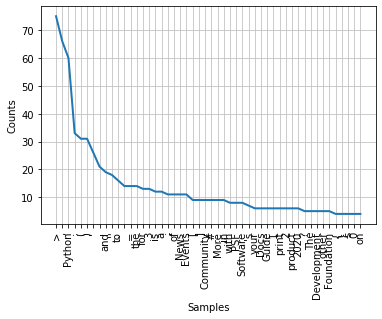

In [12]:
# Now an alternative way using the nltk library
freq_dis_nltk = nltk.FreqDist(tokens)
print(freq_dis_nltk)
freq_dis_nltk.plot(50, cumulative=False) # to plot fifty items on the x asis

<FreqDist with 496 samples and 1208 outcomes>


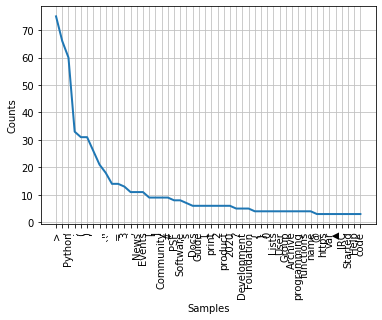

In [15]:
# As we  can see the words frequency is growing for words like a, an, the, to  : they are called as stop words.
# Article pronouns are generally present in most of the documents hence they are not discriminative enough to be informative.

from nltk.corpus import stopwords
stop_words = [w.strip().lower() for w in set(stopwords.words('english'))]
clean_tokens = [token for token in tokens if token.strip().lower() not in stop_words]
freq_dis_nltk = nltk.FreqDist(clean_tokens)
print(freq_dis_nltk)
freq_dis_nltk.plot(50, cumulative=False) # to plot fifty items on the x asis

# this is much more cleaner and without stop words.

In [16]:
# Generate a csv from the freq_dist and put it in wordle to get a cool image